# Ex2_bank_additional ------- Part 1

In [34]:
'''
Cho dữ liệu bank marketing data (tập tin bank-additional-full.csv) (UCI's Bank Marketing Data Set: link: https://archive.ics.uci.edu/ml/datasets/bank+marketing)
Dữ liệu có liên quan đến các chiến dịch tiếp thị trực tiếp (các cuộc gọi điện thoại) của một tổ chức ngân hàng Bồ Đào Nha. 
Mục tiêu phân loại là để dự đoán liệu khách hàng sẽ đăng ký một khoản tiền gửi có kỳ hạn hay không (y).

Yêu cầu:

Phần 1: Thực hiện các công việc sau:
1_Xác định các thuộc tính

2_Phân tích đơn biến

3_Để dự đoán một khách hàng sẽ đăng ký (subscribe =yes/no) cho một khoản tiền gửi có kỳ hạn (term deposit - variable y) hay không chúng ta cần các thông tin trong dữ liệu, 
hãy chọn một số thuộc tính và phân tích.

4_Phân tích hai biến

5_Xử lý dữ liệu thiếu

6_Phát hiện và xử lý ngoại lệ

'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats
import random

In [36]:
#read csv to dataframe
bank_full = pd.read_csv('data2/bank-additional-dataset/bank-additional-full.csv', sep=';')
bank_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# *********************** 1_Xác định các thuộc tính ***********************

In [39]:
print('Info of bank_full dataframe:\n')
print(bank_full.info())

Info of bank_full dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  c

In [41]:
'''Input variables:
   Bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   
   Related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   
  Other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")
'''
print('')

In [43]:
print('SHOW THE UNIQUE VALUES:\n')
for var in bank_full.columns:
    if len(bank_full[var].unique()) <= 10:
        print(f'{var}...{len(bank_full[var].unique())} unique values: {bank_full[var].unique()}')
        print()
    else:
        start = str(bank_full[var].unique()[:3]).strip(']')
        end = str(bank_full[var].unique()[-3:]).strip('[')
        print(f'{var}...{len(bank_full[var].unique())} unique values: {start} ... {end}')
        print()
        
print('='*100)
print("Output is bank_full['y'] column, input are all other columns")

SHOW THE UNIQUE VALUES:

age...78 unique values: [56 57 37 ... 84 92 89]

job...12 unique values: ['housemaid' 'services' 'admin.' ... 'unknown' 'entrepreneur' 'student']

marital...4 unique values: ['married' 'single' 'divorced' 'unknown']

education...8 unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default...3 unique values: ['no' 'unknown' 'yes']

housing...3 unique values: ['no' 'yes' 'unknown']

loan...3 unique values: ['no' 'yes' 'unknown']

contact...2 unique values: ['telephone' 'cellular']

month...10 unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week...5 unique values: ['mon' 'tue' 'wed' 'thu' 'fri']

duration...1544 unique values: [261 149 226 ... 1246 1556 1868]

campaign...42 unique values: [1 2 3 ... 33 34 43]

pdays...27 unique values: [999   6   4 ... 19 27 20]

previous...8 unique values: [0 1 2 3 4 5 6 7]

poutcome...3 unique values: ['nonexisten

# *********************** 2_Phân tích đơn biến ***********************

# 3_Để dự đoán một khách hàng sẽ đăng ký (subscribe =yes/no) cho một khoản tiền gửi có kỳ hạn (term deposit - variable y) hay không chúng ta cần các thông tin trong dữ liệu, hãy chọn một số thuộc tính và phân tích.

Choose these variables as inputs:
   Categorical variable(s): ['job', 'marital', 'education', 'default', 'loan', 'previous', 'poutcome', 'campaign', 'pdays']
   Continuous variable(s): ['duration']

Output variable: bank_full['y']

---------- job_categorical_unique12 ----------
['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']


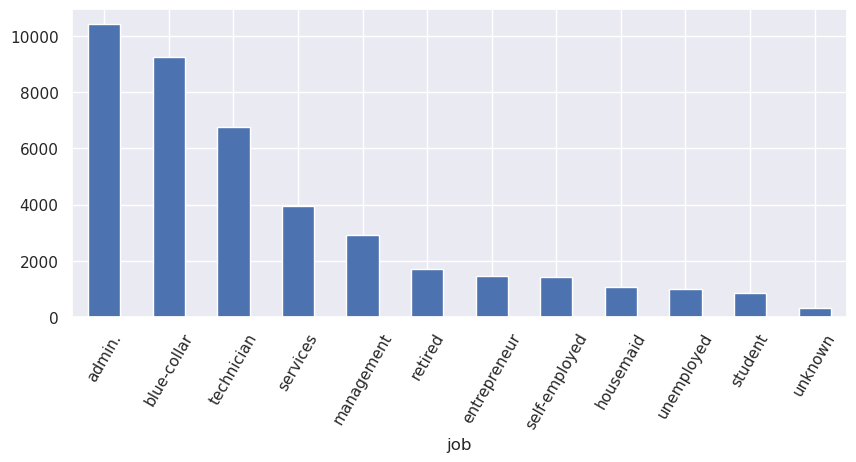


---------- marital_categorical_unique4 ----------
['divorced', 'married', 'single', 'unknown']


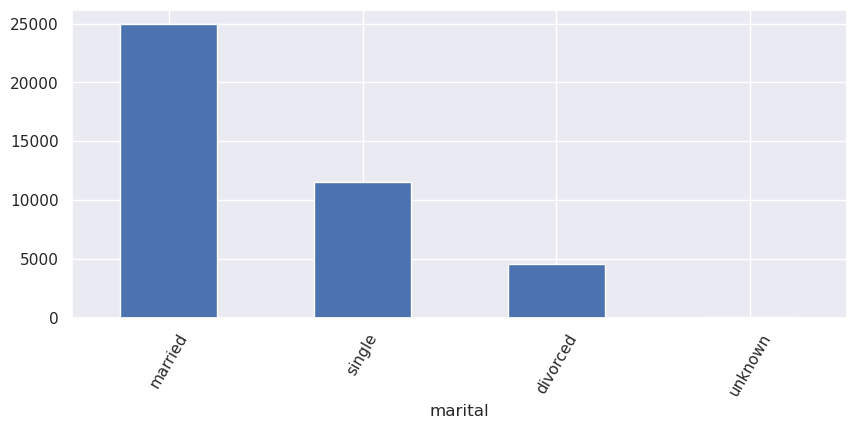


---------- education_categorical_unique8 ----------
['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']


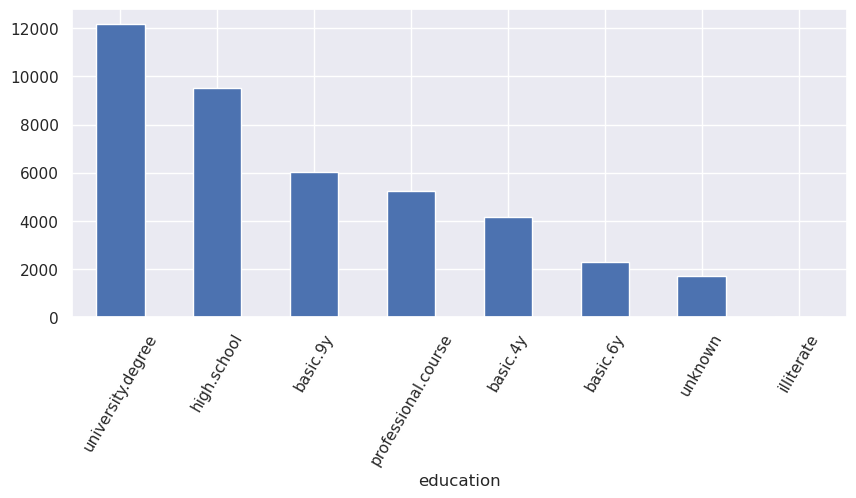


---------- default_categorical_unique3 ----------
['no', 'unknown', 'yes']


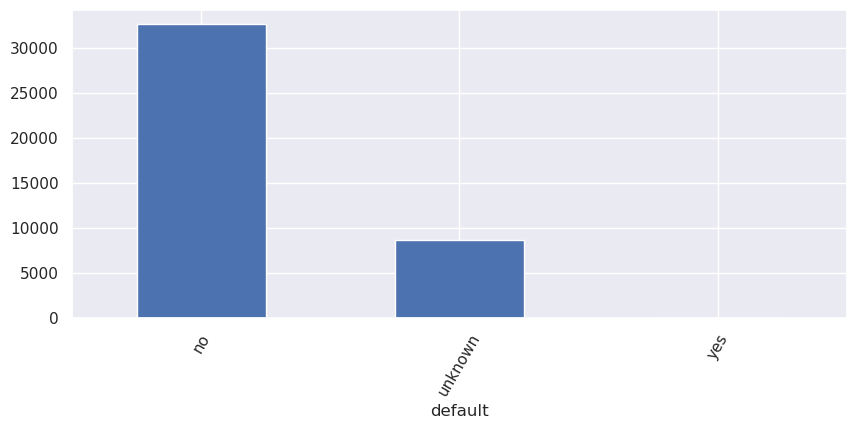


---------- loan_categorical_unique3 ----------
['no', 'unknown', 'yes']


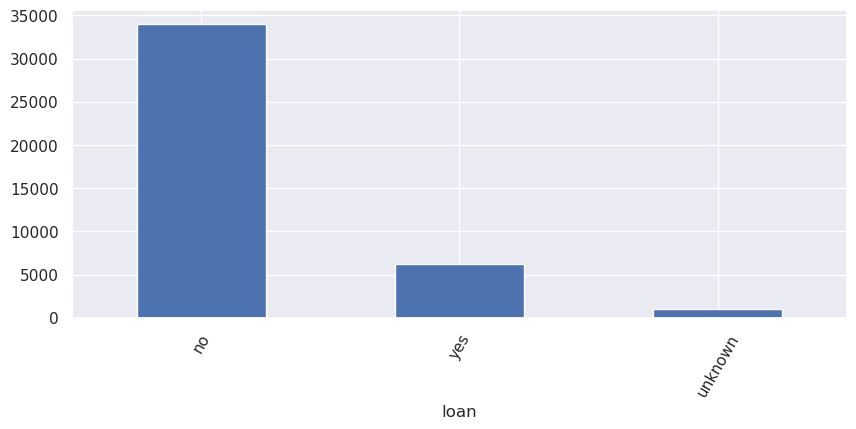


---------- previous_categorical_unique8 ----------
[0, 1, 2, 3, 4, 5, 6, 7]


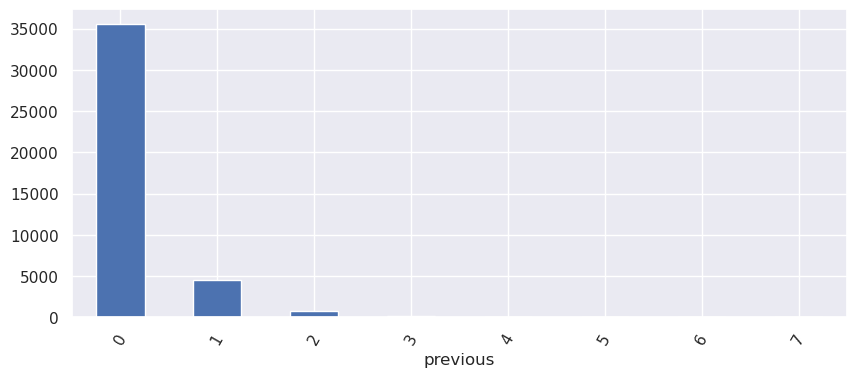


---------- poutcome_categorical_unique3 ----------
['failure', 'nonexistent', 'success']


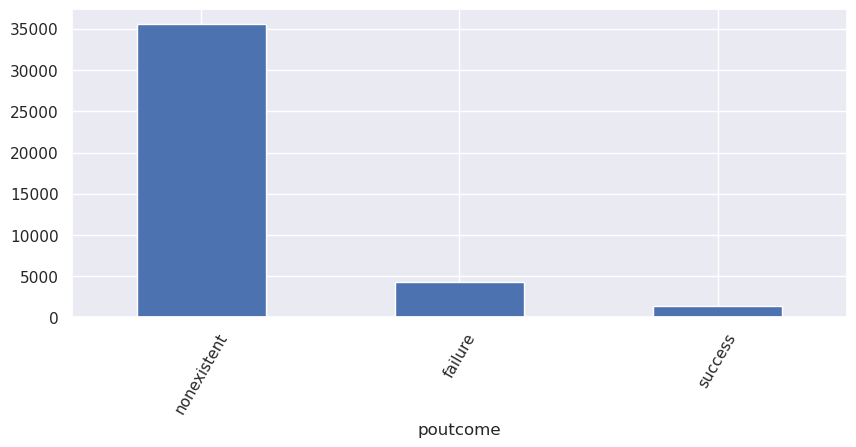


---------- campaign_categorical_unique42 ----------
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 56]


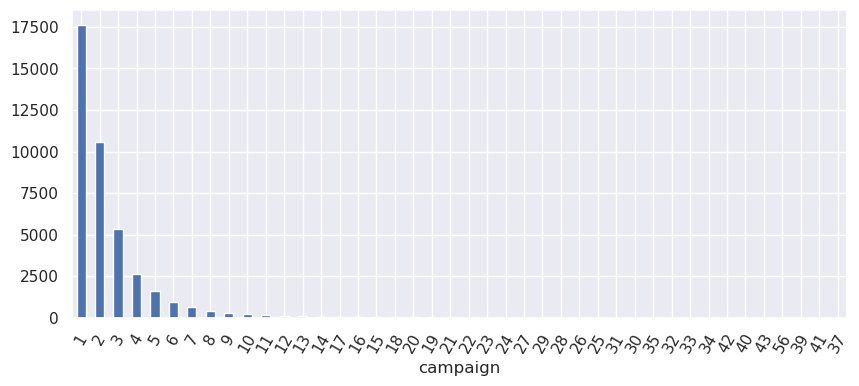


---------- pdays_categorical_unique27 ----------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 999]


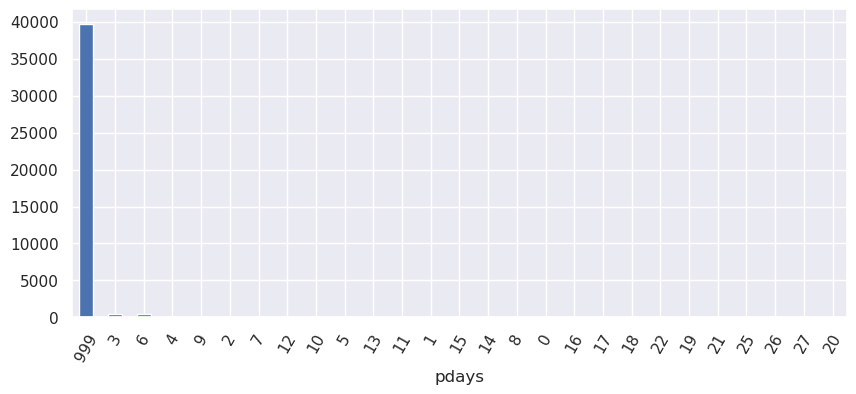


---------- y_categorical_unique2 ----------
['no', 'yes']


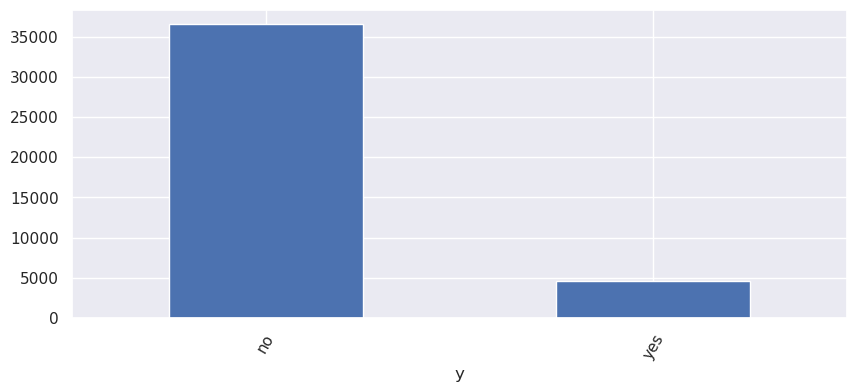


---------- duration_numerical_unique1544 ----------
duration mean = 258.2850101971448
duration median = 180.0
duration mode = 85
duration min = 0
duration max = 4918
duration range = 4918
duration Q1 (25-th quantile) = 102.0
duration Q3 (75-th quantile) = 319.0
duration IQR (Q3 - Q1) = 217.0
duration variance = 67225.72887720143
duration standard deviation = 259.2792488364648
duration skewness = 3.2630224157610432
duration kurtosis = 20.245334438614844


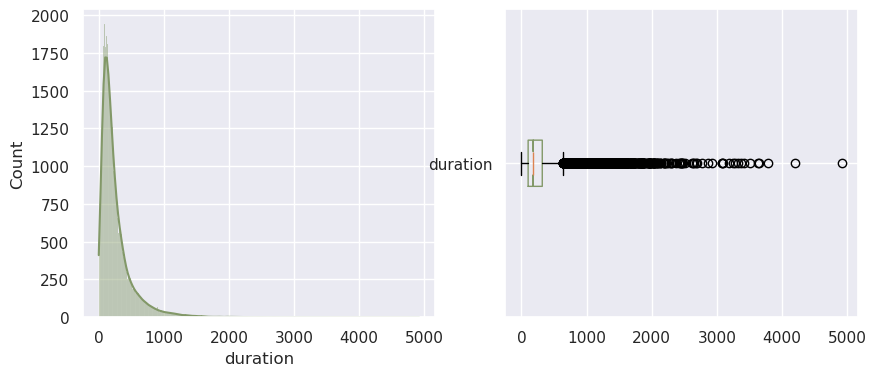

In [46]:
categ_list = ['job', 'marital', 'education', 'default', 'loan','previous', 'poutcome', 'campaign', 'pdays']
conti_list = ['duration']

print('Choose these variables as inputs:')
print('   Categorical variable(s):',categ_list)
print('   Continuous variable(s):',conti_list)

print("\nOutput variable: bank_full['y']\n")

def univariate_analysis(data,variable):
    print(f'---------- {variable}_numerical_unique{len(data[variable].unique())} ----------')
    print(f'{variable} mean = {data[variable].mean()}')
    print(f'{variable} median = {data[variable].median()}')
    print(f'{variable} mode = {stats.mode(data[variable])[0]}')
    print(f'{variable} min = {data[variable].min()}')
    print(f'{variable} max = {data[variable].max()}')
    print(f'{variable} range = {data[variable].max() - data[variable].min()}')
    print(f'{variable} Q1 (25-th quantile) = {np.quantile(data[variable], 0.25)}')
    print(f'{variable} Q3 (75-th quantile) = {np.quantile(data[variable], 0.75)}')
    print(f'{variable} IQR (Q3 - Q1) = {stats.iqr(data[variable])}')
    print(f'{variable} variance = {data[variable].var()}')
    print(f'{variable} standard deviation = {data[variable].std()}')
    print(f'{variable} skewness = {stats.skew(data[variable])}')
    print(f'{variable} kurtosis = {stats.kurtosis(data[variable])}')

    clr = "#{:06x}".format(random.randint(0,0xFFFFFF))

    sbn.set_theme(style='darkgrid')
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sbn.histplot(data[variable], color=clr, kde=True)
    plt.subplot(1,2,2)
    plt.boxplot(x=data[variable], tick_labels=[variable], boxprops=dict(color=clr), notch=True, vert=False)
    plt.show()
    print()

for col in ['job', 'marital', 'education', 'default', 'loan','previous', 'poutcome', 'campaign', 'pdays','y']: 
    print(f'---------- {col}_categorical_unique{len(bank_full[col].unique())} ----------')
    print(f'{sorted(bank_full[col].unique())}')
    plt.figure(figsize=(10,4))
    bank_full[col].value_counts().plot.bar()
    plt.xticks(rotation=60)
    plt.show()
    print()
    
univariate_analysis(bank_full, 'duration')

# *********************** 4_Phân tích hai biến ***********************
## Categorical & Categorical

Categorical pairs that need to be analyzed:
y ~ job
y ~ marital
y ~ education
y ~ default
y ~ loan
y ~ previous
y ~ poutcome
y ~ campaign
y ~ pdays

------------------y ~ job------------------
job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     9070         8616          1332        954        2596     1286   
yes    1352          638           124        106         328      434   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1272      3646      600        6013         870      293  
yes            149       323      275         730         144       37  

Hypothesis testing Chi2:
   H0: y and job are Independent
   Ha: y and job are Dependent

Chi2 statistics = 961.2424403289554
P-value = 4.189763287563861e-199 < 0.05
Degree of freedom = 11

Accept Ha: y and job are De

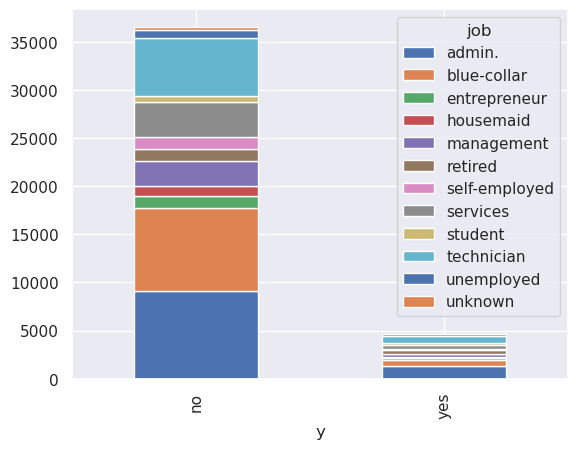


------------------y ~ marital------------------
marital  divorced  married  single  unknown
y                                          
no           4136    22396    9948       68
yes           476     2532    1620       12

Hypothesis testing Chi2:
   H0: y and marital are Independent
   Ha: y and marital are Dependent

Chi2 statistics = 122.65515182252989
P-value = 2.068014648442211e-26 < 0.05
Degree of freedom = 3

Accept Ha: y and marital are Dependent



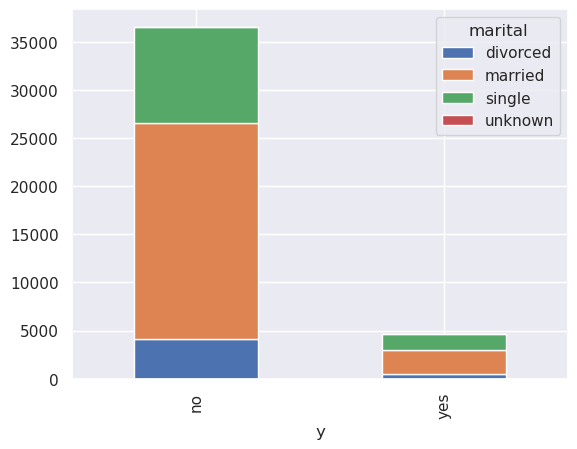


------------------y ~ education------------------
education  basic.4y  basic.6y  basic.9y  high.school  illiterate  \
y                                                                  
no             3748      2104      5572         8484          14   
yes             428       188       473         1031           4   

education  professional.course  university.degree  unknown  
y                                                           
no                        4648              10498     1480  
yes                        595               1670      251  

Hypothesis testing Chi2:
   H0: y and education are Independent
   Ha: y and education are Dependent

Chi2 statistics = 193.10590454149565
P-value = 3.3051890144025054e-38 < 0.05
Degree of freedom = 7

Accept Ha: y and education are Dependent



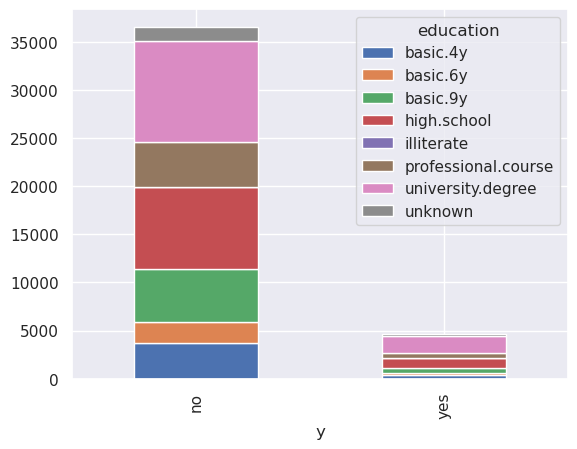


------------------y ~ default------------------
default     no  unknown  yes
y                           
no       28391     8154    3
yes       4197      443    0

Hypothesis testing Chi2:
   H0: y and default are Independent
   Ha: y and default are Dependent

Chi2 statistics = 406.5775146420093
P-value = 5.1619579513916376e-89 < 0.05
Degree of freedom = 2

Accept Ha: y and default are Dependent



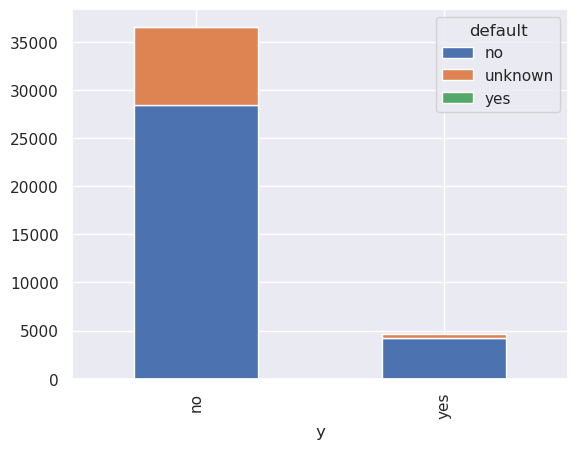


------------------y ~ loan------------------
loan     no  unknown   yes
y                         
no    30100      883  5565
yes    3850      107   683

Hypothesis testing Chi2:
   H0: y and loan are Independent
   Ha: y and loan are Dependent

Chi2 statistics = 1.094027551150338
 >= 0.05
Degree of freedom = 2

Accept H0: y and loan are Independent



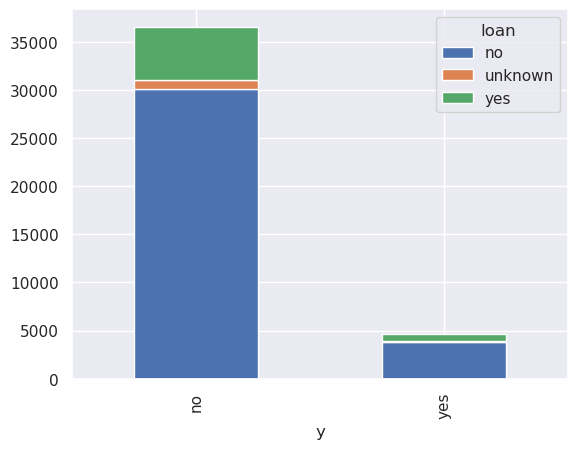


------------------y ~ previous------------------
previous      0     1    2    3   4   5  6  7
y                                            
no        32422  3594  404   88  32   5  2  1
yes        3141   967  350  128  38  13  3  0

Hypothesis testing Chi2:
   H0: y and previous are Independent
   Ha: y and previous are Dependent

Chi2 statistics = 2299.436359620133
P-value = 0.0 < 0.05
Degree of freedom = 7

Accept Ha: y and previous are Dependent



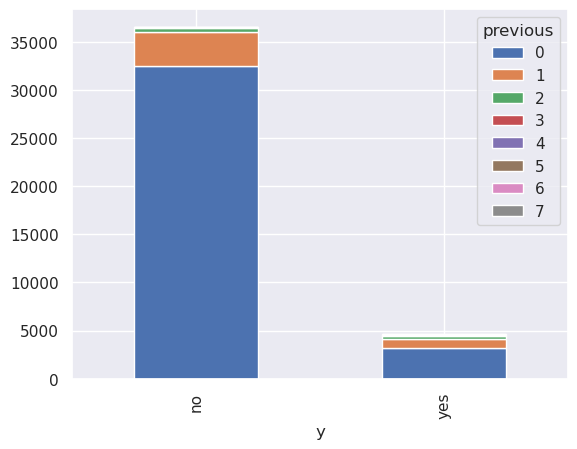


------------------y ~ poutcome------------------
poutcome  failure  nonexistent  success
y                                      
no           3647        32422      479
yes           605         3141      894

Hypothesis testing Chi2:
   H0: y and poutcome are Independent
   Ha: y and poutcome are Dependent

Chi2 statistics = 4230.5237978319765
P-value = 0.0 < 0.05
Degree of freedom = 2

Accept Ha: y and poutcome are Dependent



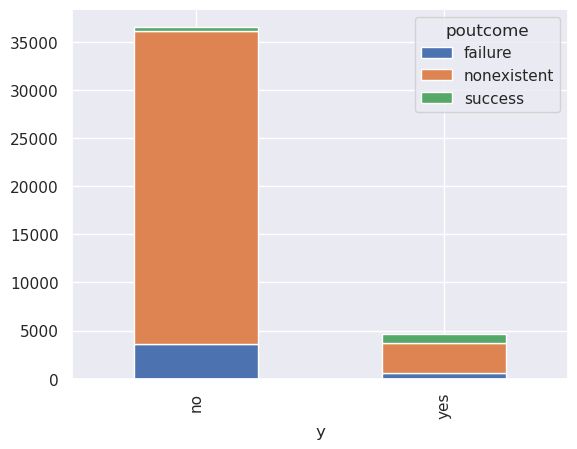


------------------y ~ campaign------------------
campaign     1     2     3     4     5    6    7    8    9    10  ...  33  34  \
y                                                                 ...           
no        15342  9359  4767  2402  1479  904  591  383  266  213  ...   4   3   
yes        2300  1211   574   249   120   75   38   17   17   12  ...   0   0   

campaign  35  37  39  40  41  42  43  56  
y                                         
no         5   1   1   2   1   2   2   1  
yes        0   0   0   0   0   0   0   0  

[2 rows x 42 columns]

Hypothesis testing Chi2:
   H0: y and campaign are Independent
   Ha: y and campaign are Dependent

Chi2 statistics = 218.86337668556098
P-value = 3.88175438141391e-26 < 0.05
Degree of freedom = 41

Accept Ha: y and campaign are Dependent



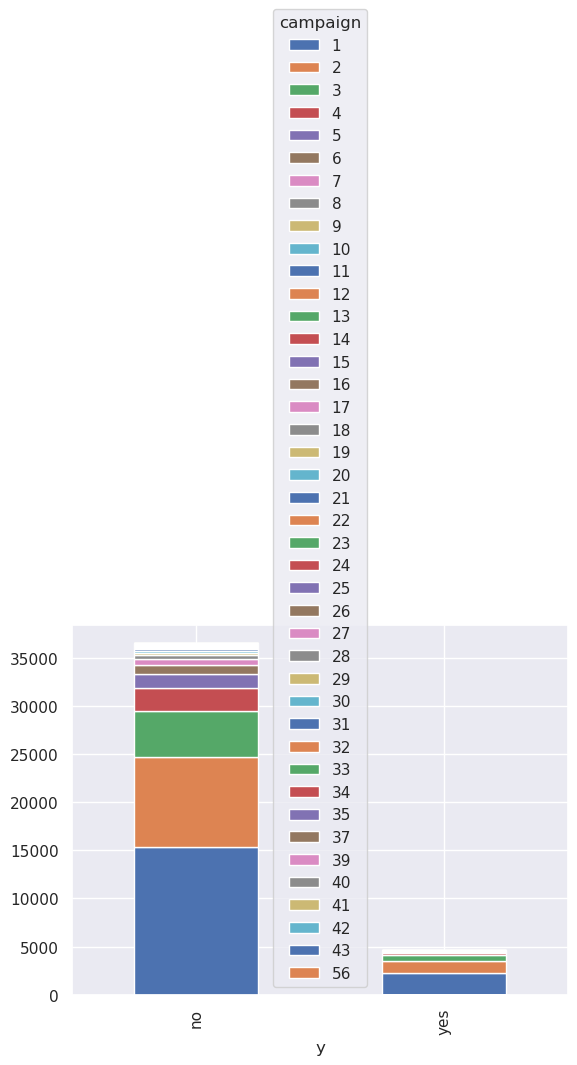


------------------y ~ pdays------------------
pdays  0    1    2    3    4    5    6    7    8    9    ...  17   18   19   \
y                                                        ...                  
no       5   18   24  141   55   17  123   20    6   29  ...    6    3    2   
yes     10    8   37  298   63   29  289   40   12   35  ...    2    4    1   

pdays  20   21   22   25   26   27     999  
y                                           
no       1    0    1    0    0    0  36000  
yes      0    2    2    1    1    1   3673  

[2 rows x 27 columns]

Hypothesis testing Chi2:
   H0: y and pdays are Independent
   Ha: y and pdays are Dependent

Chi2 statistics = 4480.249822173039
P-value = 0.0 < 0.05
Degree of freedom = 26

Accept Ha: y and pdays are Dependent



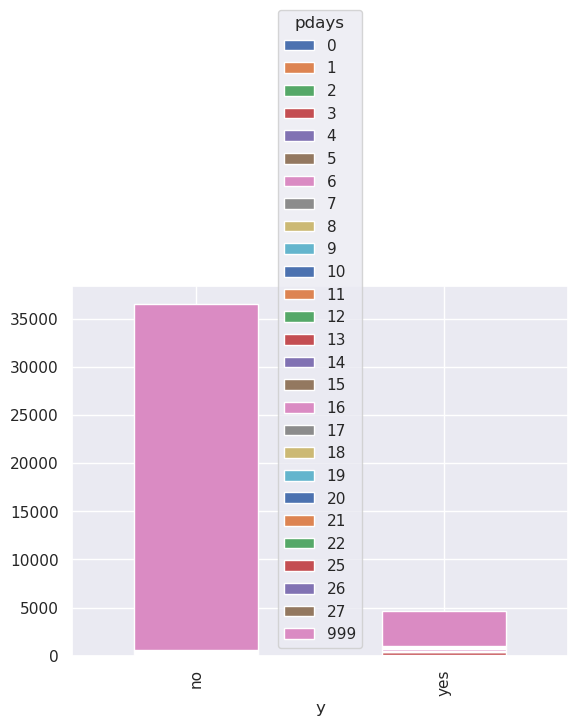

In [49]:
categ_in_list = ['job', 'marital', 'education', 'default', 'loan','previous', 'poutcome', 'campaign', 'pdays']
pairs_list = [('y', i) for i in categ_in_list]

print('Categorical pairs that need to be analyzed:')
for pair in pairs_list:
    print(f'{pair[0]} ~ {pair[1]}')
print()


def bivariate_categ1_categ2_analysis(data, categ1, categ2):
    print(f'------------------{categ1} ~ {categ2}------------------')
    
    table_2way = pd.crosstab(data[categ1], data[categ2])
    print(table_2way)
    print()
    
    
    stat, p, DoF, expected = stats.chi2_contingency(table_2way)
    print('Hypothesis testing Chi2:')
    print(f'   H0: {categ1} and {categ2} are Independent')
    print(f'   Ha: {categ1} and {categ2} are Dependent\n')
    print(f'Chi2 statistics = {stat}')
    print(f'P-value = {p}'+' < 0.05' if p<0.05 else ' >= 0.05')
    print(f'Degree of freedom = {DoF}\n')
    
    if p >= 0.05: print(f'Accept H0: {categ1} and {categ2} are Independent\n')
    else: print(f'Accept Ha: {categ1} and {categ2} are Dependent\n')

    table_2way.plot.bar(stacked=True)
    plt.show()
    print()

for categ1, categ2 in pairs_list:
    bivariate_categ1_categ2_analysis(bank_full, categ1, categ2)

# *********************** 4_Phân tích hai biến ***********************
## Continuous & Categorical

Continuous ~ Categorical pair for analysis: 'duration' ~ 'y'



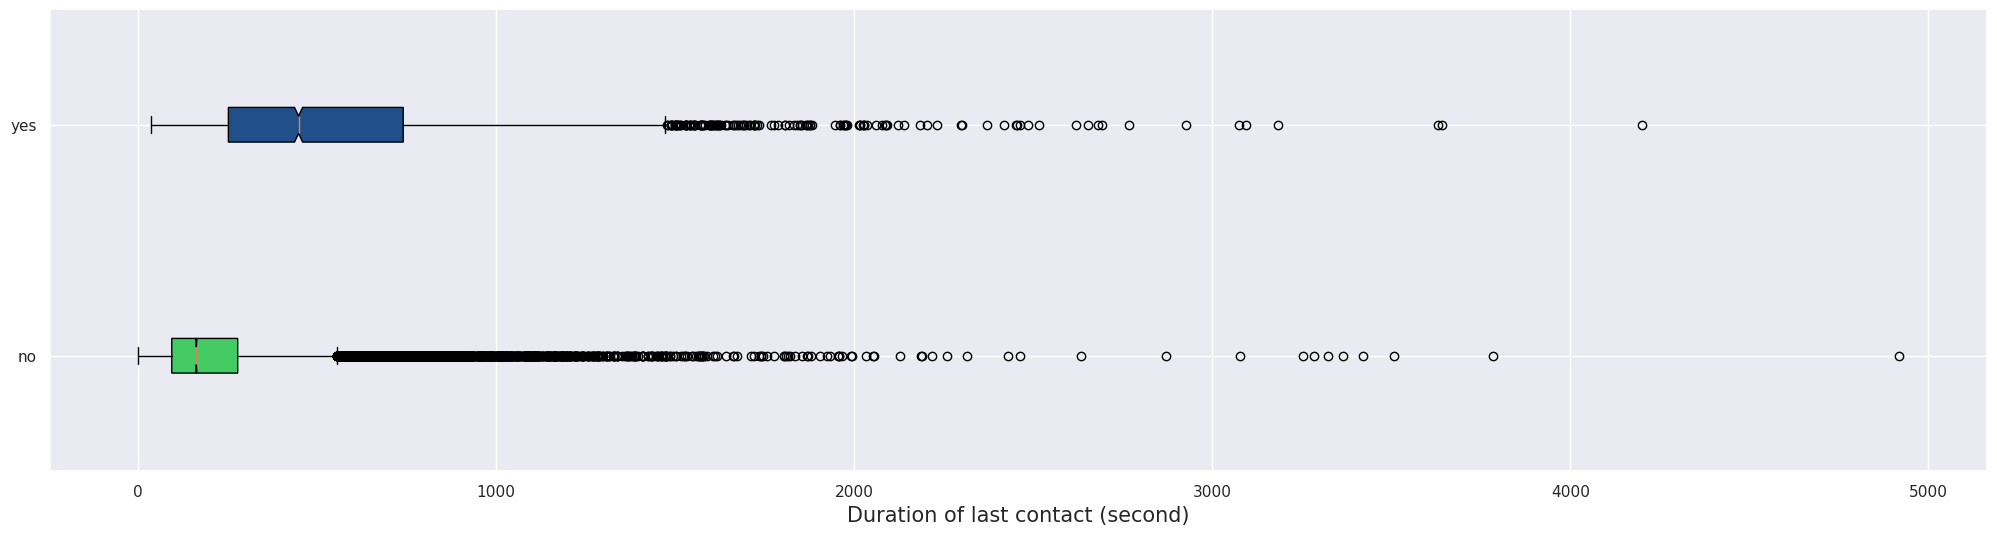

In [52]:
print("Continuous ~ Categorical pair for analysis: 'duration' ~ 'y'\n")


#-----------------------Visualize------------------------------------------------#
dura_y_dict =  bank_full['duration'].groupby(bank_full['y']).apply(list).to_dict()

random.seed(1)
clr1 = "#{:06x}".format(random.randint(0,0xFFFFFF))
clr2 = clr1
while clr2 == clr1:
    clr2 = "#{:06x}".format(random.randint(0,0xFFFFFF))

plt.figure(figsize=(25,6))
box = plt.boxplot(dura_y_dict.values(), tick_labels=dura_y_dict.keys(), notch=True, vert=False, patch_artist=True)
plt.xlabel('Duration of last contact (second)', size=15)

for patch, color in zip(box['boxes'], [clr1,clr2]):
    patch.set_facecolor(color)

plt.show()

In [54]:
#--------------Perform test for normality-------------------#
print("-------Hypotheses of test for normality-----------")
print('H0: the sample comes from the normal distribution')
print('Ha: the sample does not come from the normal distribution\n')

for categ, conti in list(dura_y_dict.items()):
    if len(conti) <= 5000:
        p_shapiro = stats.shapiro(conti)[1]
        print(f'duration_{categ} p_shapiro = {p_shapiro}'+ (' >= 0.5' if (p_shapiro >= 0.5) else ' < 0.5'))
        if p_shapiro >= 0.5: print(f'Accept H0: duration_{categ} comes from the normal distribution\n')
        else: print(f'Accept H1: duration_{categ} does not comes from the normal distribution\n')

    else: #Perform D'Angostino test for normality, for sample > 5000 observations
        p_angostino = stats.normaltest(conti).pvalue
        print(f'duration_{categ} p_angostino = {p_angostino}'+ (' >= 0.5' if (p_angostino >= 0.5) else ' < 0.5'))
        if p_angostino >= 0.5: print(f'Accept H0: duration_{categ} comes from the normal distribution\n')
        else: print(f'Accept H1: duration_{categ} does not comes from the normal distribution\n')

#-----------------Use Mann-Whitney U test to compare------------------#
print('---------------- Use Mann-Whitney U test to compare duration_no and duration_yes ----------------------')
print('H0: the samples have the same location (meaning duration does not affect the yes_no answer)')
print('Ha: the sample have different location (meaning duration affects the yes_no answer)\n')

#---------data too large to perform the test in this computer---------------#
'''
p_whitney = stats.mannwhitneyu(*dura_y_dict.values(), method='exact', alternative='two-sided')
print(f'Mann-Whitney p-value = {p_whitney}' + (' >= 0.5' if (p_whitney >= 0.5) else ' < 0.5'))

if p_angostino >= 0.5: 
    print(f'Acept H0: the samples have the same location (meaning duration does not affect the yes_no answer\n')
else: 
    print(f'Accept H1: the sample have different location (meaning duration affects the yes_no answer)\n')
'''
print()

-------Hypotheses of test for normality-----------
H0: the sample comes from the normal distribution
Ha: the sample does not come from the normal distribution

duration_no p_angostino = 0.0 < 0.5
Accept H1: duration_no does not comes from the normal distribution

duration_yes p_shapiro = 6.001996579500783e-54 < 0.5
Accept H1: duration_yes does not comes from the normal distribution

---------------- Use Mann-Whitney U test to compare duration_no and duration_yes ----------------------
H0: the samples have the same location (meaning duration does not affect the yes_no answer)
Ha: the sample have different location (meaning duration affects the yes_no answer)




# *********************** 5_Xử lý dữ liệu thiếu ***********************

In [57]:
prin(bank_full[['job', 'marital', 'education', 'default', 'loan','previous', 'poutcome', 'campaign', 'pdays','duration']].isnull().sum())
print('\nNo missing values')

job          0
marital      0
education    0
default      0
loan         0
previous     0
poutcome     0
campaign     0
pdays        0
duration     0
dtype: int64

# *********************** 6_Phát hiện và xử lý ngoại lệ ***********************

In [67]:
print('Continuous variables that need to process outliers: duration')

def remove_outliers (data, variable):
    q1 = np.quantile(data[variable], 0.25)
    q3 = np.quantile(data[variable], 0.75)
    iqr = stats.iqr(data[variable])

    condition = (data[variable] >= q1 - 1.5*iqr) & (data[variable] <= q3 + 1.5*iqr)
    no_outliers = np.extract(condition, data[variable])

    return no_outliers

duration_no_out = remove_outliers(bank_full, 'duration')

print(f'\nduration without outliers size_{len(duration_no_out)} (original size {len(bank_full['duration'])}): {duration_no_out}')

Continuous variables that need to process outliers: duration

duration without outliers size_38225 (original size 41188): [261 149 226 ... 189 442 239]
